***Steps:**
1. Importing all the libraries
2. data loading
3. EDA
4. Visualization
5. Feature Selection- RFE (Recursive Feature Elimination)
6. Model Creation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Weather Training Data.csv")
df

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


In [6]:
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# here using all the data we need to tell weather it rains today or tomorrow

In [8]:
df["RainToday"].value_counts()

RainToday
No     76481
Yes    22056
Name: count, dtype: int64

In [9]:
df.shape

(99516, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [11]:
#now we need to remove or fill columns having null values

In [12]:
df.describe()#to get statistical data of only numerical columns

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [13]:
df.describe(include='all')#to get statistical data including categorical columns

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,99516,99516,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,92995,93036.000000,92510,...,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,98537,99516.000000
unique,99516,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Row0,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,2393,NaN,NaN,NaN,NaN,NaN,6843,NaN,8052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76481,NaN
mean,NaN,NaN,12.176266,23.218513,2.353024,5.46132,7.615090,NaN,39.976966,NaN,...,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,NaN,0.224677
std,NaN,NaN,6.390882,7.115072,8.487866,4.16249,3.783008,NaN,13.581524,NaN,...,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,NaN,0.417372
min,NaN,NaN,-8.500000,-4.100000,0.000000,0.00000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,NaN,0.000000
25%,NaN,NaN,7.600000,17.900000,0.000000,2.60000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000
50%,NaN,NaN,12.000000,22.600000,0.000000,4.80000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000
75%,NaN,NaN,16.800000,28.200000,0.800000,7.40000,10.600000,NaN,48.000000,NaN,...,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,NaN,0.000000


In [14]:
df.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [15]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [16]:
df.isnull().sum()

row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

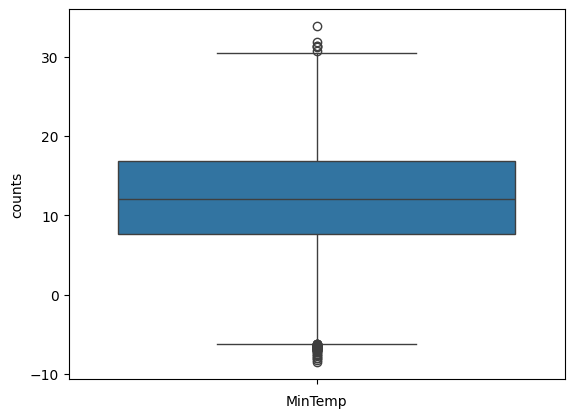

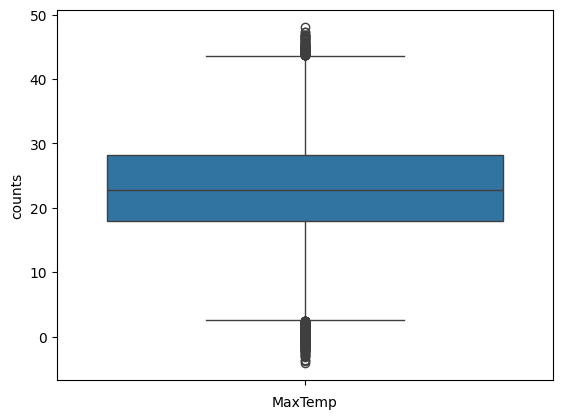

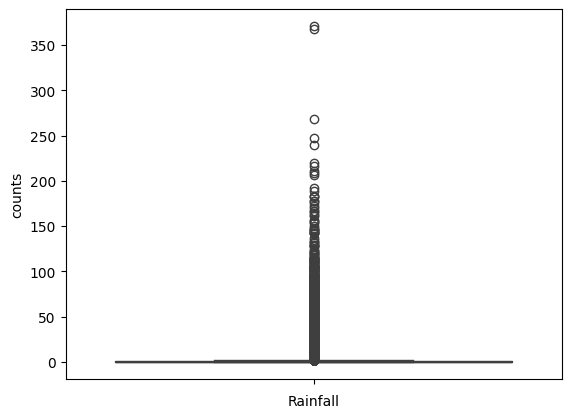

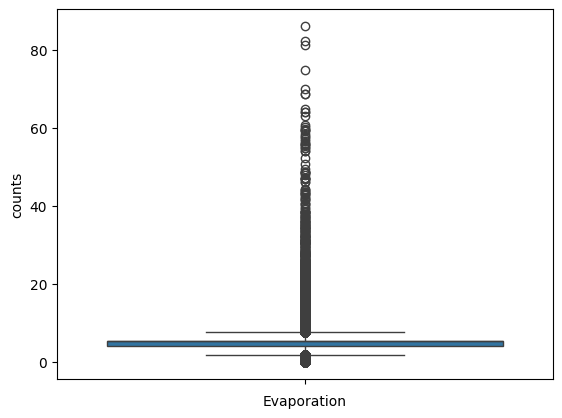

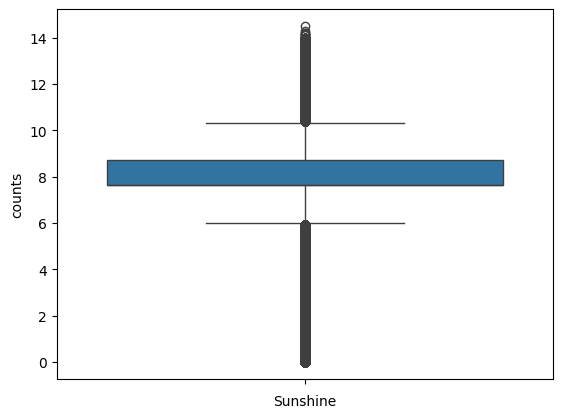

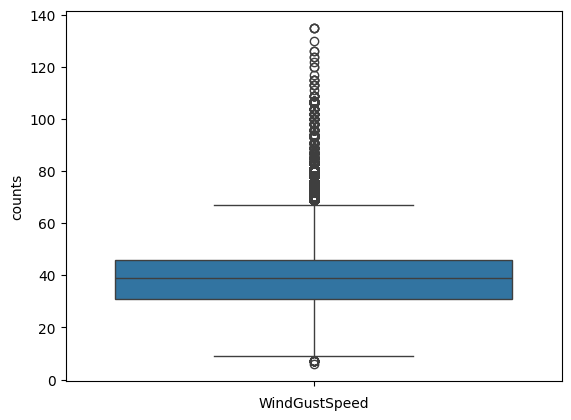

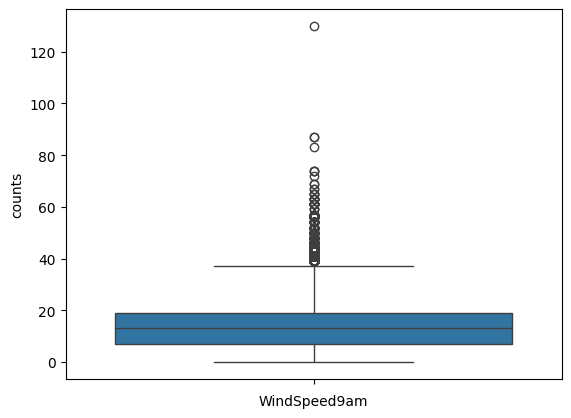

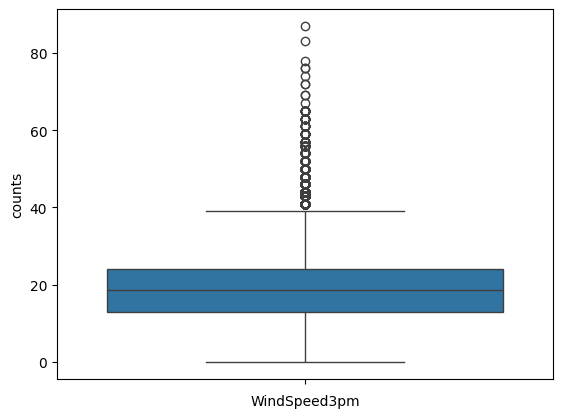

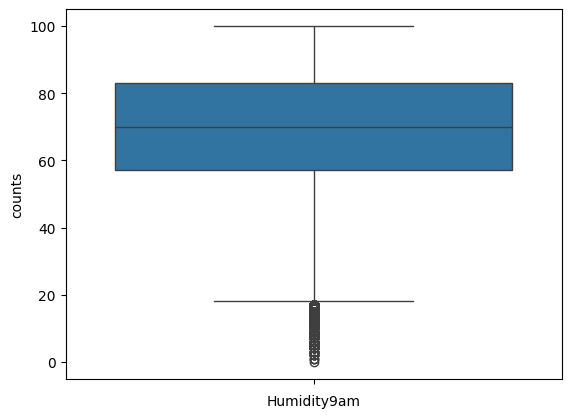

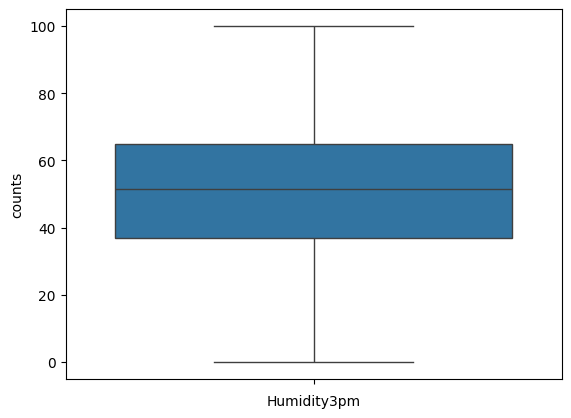

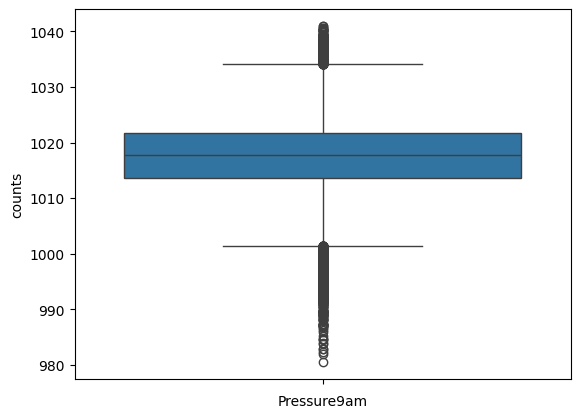

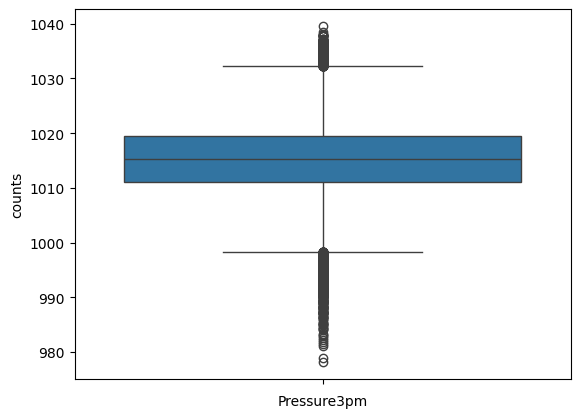

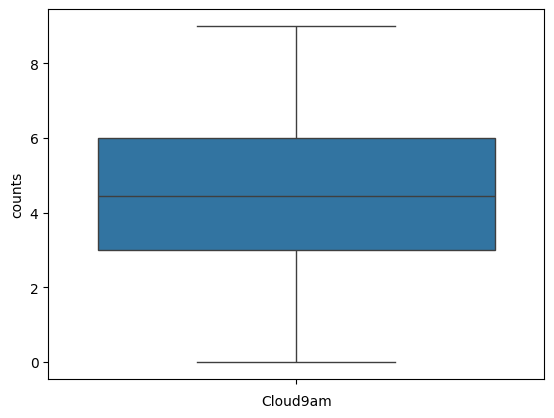

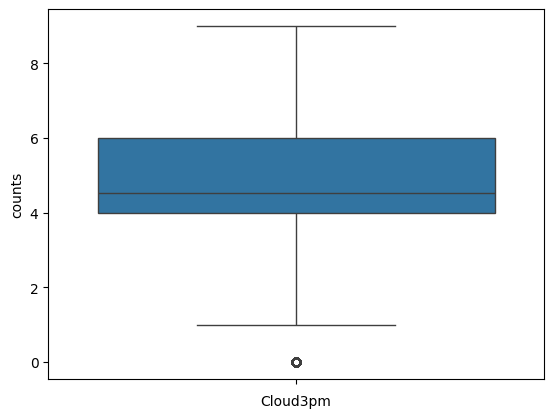

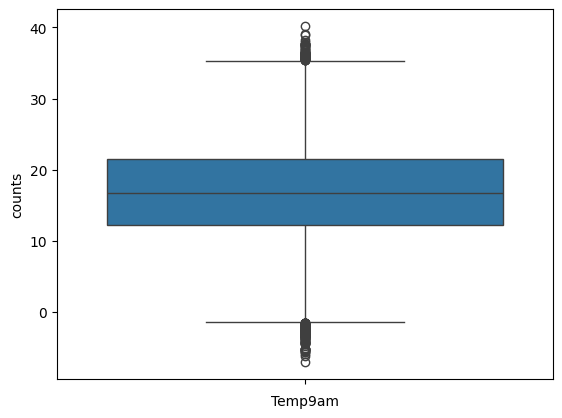

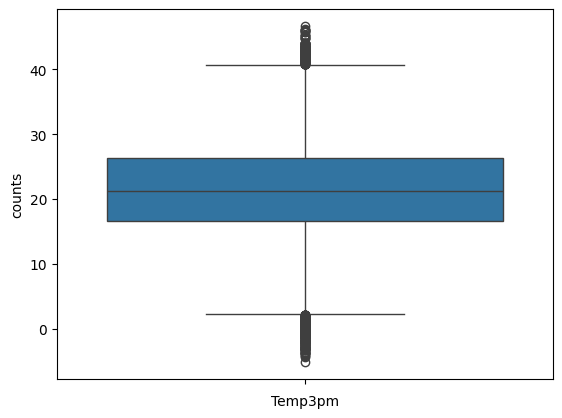

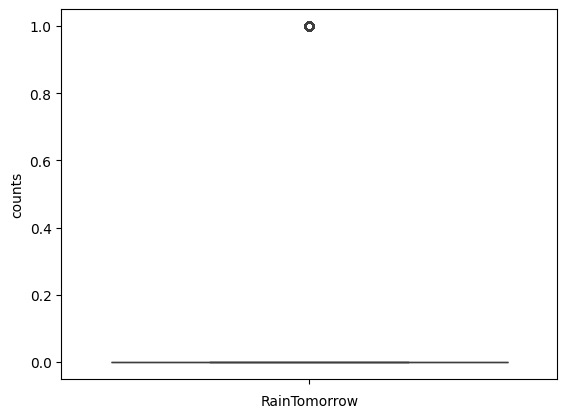

In [17]:
for i in df.columns:
    if((df[i].dtypes=="int64") or (df[i].dtype=="float64")):
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("counts")
        plt.show()

In [18]:
out_list=[ 'MinTemp', 'MaxTemp',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99516 non-null  float64
 3   MaxTemp        99516 non-null  float64
 4   Rainfall       99516 non-null  float64
 5   Evaporation    99516 non-null  float64
 6   Sunshine       99516 non-null  float64
 7   WindGustDir    99516 non-null  object 
 8   WindGustSpeed  99516 non-null  float64
 9   WindDir9am     99516 non-null  object 
 10  WindDir3pm     99516 non-null  object 
 11  WindSpeed9am   99516 non-null  float64
 12  WindSpeed3pm   99516 non-null  float64
 13  Humidity9am    99516 non-null  float64
 14  Humidity3pm    99516 non-null  float64
 15  Pressure9am    99516 non-null  float64
 16  Pressure3pm    99516 non-null  float64
 17  Cloud9am       99516 non-null  float64
 18  Cloud3

In [20]:
for i in out_list:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>=Q1-1.5*IQR)&(df[i]<=Q3+1.5*IQR)]

In [21]:
#Feature Selection
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,Row1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,0
3,Row3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,5.46132,7.61509,W,28.0,S,...,58.0,27.0,1007.0,1005.7,4.447985,4.519122,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,5.46132,7.61509,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,4.447985,4.519122,20.4,28.8,No,1


In [22]:
x=df.iloc[:,:-2]#including all rows and excluding last two columns
x

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1,Row1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3
3,Row3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,...,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9
4,Row4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,...,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5
5,Row5,Albury,13.1,30.1,1.4,5.46132,7.61509,W,28.0,S,...,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447985,4.519122,20.1,28.2
6,Row6,Albury,13.4,30.4,0.0,5.46132,7.61509,N,30.0,SSE,...,17.0,6.0,48.0,22.0,1011.8,1008.7,4.447985,4.519122,20.4,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99510,Row101815,Uluru,6.4,23.4,0.0,5.46132,7.61509,ESE,31.0,S,...,15.0,17.0,53.0,25.0,1025.8,1023.0,4.447985,4.519122,11.2,23.1
99512,Row101817,Uluru,3.5,21.8,0.0,5.46132,7.61509,E,31.0,ESE,...,15.0,13.0,59.0,27.0,1024.7,1021.2,4.447985,4.519122,9.4,20.9
99513,Row101818,Uluru,2.8,23.4,0.0,5.46132,7.61509,E,31.0,SE,...,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447985,4.519122,10.1,22.4
99514,Row101819,Uluru,3.6,25.3,0.0,5.46132,7.61509,NNW,22.0,SE,...,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447985,4.519122,10.9,24.5


In [23]:
y=df.iloc[:,-2]#including all rows and only the second last column
y

1         No
3         No
4         No
5        Yes
6         No
        ... 
99510     No
99512     No
99513     No
99514     No
99515     No
Name: RainToday, Length: 28466, dtype: object

In [24]:
#Convering categorical columns into numerical for this we use the method "Label Encoding"

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
for i in x.columns:
    if x[i].dtypes=="object":
        x[i]=le.fit_transform(x[i])

In [28]:
x.head(5)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1,0,2,7.4,25.1,0.0,5.46132,7.61509,14,44.0,6,...,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3
3,7857,2,14.6,29.7,0.2,5.46132,7.61509,14,56.0,13,...,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9
4,13534,2,7.7,26.7,0.0,5.46132,7.61509,13,35.0,10,...,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5
5,14536,2,13.1,30.1,1.4,5.46132,7.61509,13,28.0,8,...,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447985,4.519122,20.1,28.2
6,16550,2,13.4,30.4,0.0,5.46132,7.61509,3,30.0,10,...,17.0,6.0,48.0,22.0,1011.8,1008.7,4.447985,4.519122,20.4,28.8


In [29]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
#Feature- Recursive Feature Elimination(RFE)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [34]:
#Mentioning the number of features to be selected
k=10
rfe= RFE(model, n_features_to_select=k)

In [35]:
#fit the RFE model to the data
rfe.fit(x,y)

C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [36]:
#to see which columns have been selected
rfe.support_

array([False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False,  True])

In [37]:
#to get the index and column names of the selected columns
selected_indices=[i for i,selected in enumerate(rfe.support_) if selected]
selected_indices

[2, 3, 4, 5, 9, 11, 13, 15, 16, 20]

In [38]:
#to get the names of the selected columns
column_names=x.columns
selected_column_names=[column_names[i] for i in selected_indices]
selected_column_names

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'WindDir9am',
 'WindSpeed9am',
 'Humidity9am',
 'Pressure9am',
 'Pressure3pm',
 'Temp3pm']

In [39]:
#if we want to create only the data of these columns then
x=x.loc[:,['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'WindDir9am',
 'WindSpeed9am',
 'Humidity9am',
 'Pressure9am',
 'Pressure3pm',
 'Temp3pm']]

In [40]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,WindDir9am,WindSpeed9am,Humidity9am,Pressure9am,Pressure3pm,Temp3pm
1,7.4,25.1,0.0,5.46132,6,4.0,44.0,1010.6,1007.8,24.3
3,14.6,29.7,0.2,5.46132,13,19.0,55.0,1009.2,1005.4,28.9
4,7.7,26.7,0.0,5.46132,10,6.0,48.0,1013.4,1010.1,25.5
5,13.1,30.1,1.4,5.46132,8,15.0,58.0,1007.0,1005.7,28.2
6,13.4,30.4,0.0,5.46132,10,17.0,48.0,1011.8,1008.7,28.8
...,...,...,...,...,...,...,...,...,...,...
99510,6.4,23.4,0.0,5.46132,8,15.0,53.0,1025.8,1023.0,23.1
99512,3.5,21.8,0.0,5.46132,2,15.0,59.0,1024.7,1021.2,20.9
99513,2.8,23.4,0.0,5.46132,9,13.0,51.0,1024.6,1020.3,22.4
99514,3.6,25.3,0.0,5.46132,9,13.0,56.0,1023.5,1019.1,24.5


In [41]:
#Model

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=34)

In [43]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,WindDir9am,WindSpeed9am,Humidity9am,Pressure9am,Pressure3pm,Temp3pm
86784,13.0,22.2,1.000000,5.46132,12,17.0,60.0,1016.300000,1016.300000,21.0
4007,7.4,24.0,0.000000,5.46132,12,6.0,69.0,1012.400000,1006.900000,23.6
17182,14.9,34.5,0.000000,5.46132,14,4.0,75.0,1017.684638,1015.286204,33.8
74141,18.7,33.4,2.353024,5.46132,10,22.0,66.0,1007.500000,1004.700000,32.0
17673,19.4,21.9,0.000000,5.46132,5,7.0,80.0,1017.684638,1015.286204,16.4
...,...,...,...,...,...,...,...,...,...,...
99384,16.6,31.5,0.000000,5.46132,2,28.0,29.0,1015.500000,1012.500000,29.7
80288,6.7,23.9,0.000000,5.46132,1,13.0,52.0,1020.400000,1018.400000,22.9
33602,9.6,12.1,2.000000,5.46132,3,0.0,99.0,1026.600000,1023.000000,11.6
14237,12.6,14.8,31.600000,5.46132,13,9.0,100.0,1019.100000,1017.800000,14.6


In [44]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [45]:
#Importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()

In [47]:
lr.fit(x_train,y_train)

C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred=lr.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_pred,y_test)

0.9646996838777661

In [51]:
#Finding the accuracy of model using confusion metrics
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test,y_pred)

array([[4536,   88],
       [ 113,  957]], dtype=int64)